In [1]:
#importando as libs
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
#obtendo dataset minist
#ja no keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#saida
#imagens de treino
print(len(x_train))
#imagens de teste
print(len(x_test))
#como e o formato de uma imagem
print(x_train[0].shape)
#como sao os dados de uma imagem
print(x_train[0])

11493376/11490434 [==============================] - 35s 3us/step
60000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  3

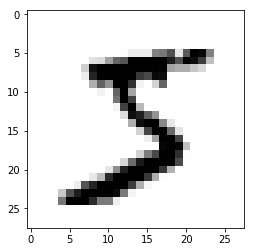

In [5]:
#para ver os dados anteriores com matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [7]:
#transformando a imagem 2d em um vetor 28*28 = 784

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train[0])

#normalizando para valores entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train[0])

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
#ajustando o formato da saída 
num_classes = 10

#o dataset tem como saida os labels
print(y_train[0])
#convertendo para um vetor de saida com 10 dimensoes 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#criando o modelo Sequential

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compila o modelo
model.compile(loss='categorical_crossentropy', 
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [11]:
#treina com os parte dos dados
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 2.0151 - acc: 0.3578 - val_loss: 1.5263 - val_acc: 0.4840
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.3819 - acc: 0.4973 - val_loss: 1.0633 - val_acc: 0.6667
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.0989 - acc: 0.6056 - val_loss: 0.8451 - val_acc: 0.7367
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.9492 - acc: 0.6664 - val_loss: 0.7248 - val_acc: 0.7829
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.8579 - acc: 0.7051 - val_loss: 0.6479 - val_acc: 0.8112
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7832 - acc: 0.7387 - val_loss: 0.5713 - val_acc: 0.8440
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.7217 - acc: 0.7692 - val_loss: 0.5123 - val_acc

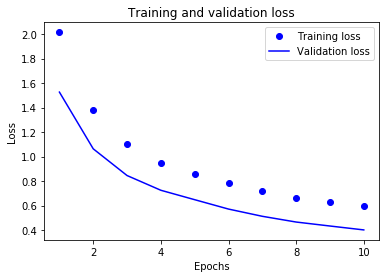

In [12]:
#vendo como ficou o treino
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, epochs + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

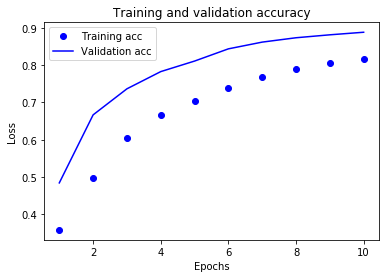

In [13]:
#como a acuraria evoluiu

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#teste
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Teste accuracy:', score[0])


Test loss: 0.40110880346298217
Teste accuracy: 0.40110880346298217


In [17]:
#testando uma entrada qualquer 
print(y_train[10])
print(model.predict(x_train[10].reshape((1,784))))
print(model.predict_classes(x_train[10].reshape((1,784))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[8.1573831e-05 6.4087508e-04 2.1925250e-02 9.3357879e-01 4.8478778e-06
  7.1246186e-03 2.0111034e-05 1.6597413e-03 3.4902528e-02 6.1703307e-05]]
[3]


In [22]:
#vendo reports usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

#classificando toda a base de teste
y_pred = model.predict_classes(x_test)
#voltando para o formato de classes
import numpy as np
y_test_c = np.argmax(y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))


Confusion Matrix
[[ 945    0    3    2    3   14   10    1    2    0]
 [   0 1110    4    3    0    0    3    1   13    1]
 [  10   13  901   33   13    2   21    7   30    2]
 [   2    3   34  896    0   27    0   22   23    3]
 [   2    4    5    0  884    0   16    0    7   64]
 [  14    3    8   67   11  705   20    7   48    9]
 [  24    2   11    0    8   13  898    0    2    0]
 [   3   28   20    9    6    0    0  914    2   46]
 [   9   18    9   38    3   37   20    8  810   22]
 [  15    3    1   10   86    8    2   51   10  823]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.94      0.98      0.96      1135
           2       0.90      0.87      0.89      1032
           3       0.85      0.89      0.87      1010
           4       0.87      0.90      0.89       982
           5       0.87      0.79      0.83       892
           6       0.91      0.94      0.92       9

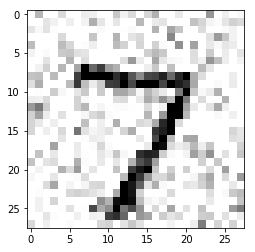

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Test loss: 6.59083689956665
Test accuracy: 0.5851


In [25]:
#introduzindo ruido

#lendo novamente
(xtr, ytr), (x_te, y_te) = mnist.load_data()
x_te = x_te.reshape(10000, 784)

#normalizando para valores entre 0 e 1
x_te = x_te.astype('float32')
x_te /= 255

#ruido
import numpy as np
mean = 0
stddev = 0.2
noise = np.random.normal(mean, stddev, (10000, 784))
x_te = x_te + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(10000,28,28)[0], cmap=plt.cm.binary)
plt.show()

print(y_test[0])

#testa 
score = model.evaluate(x_te, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])